----- Build dataset -----

In [1]:
from google.colab import files
uploaded = files.upload()

Saving anuka1200.zip to anuka1200.zip


In [2]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['anuka1200.zip']), 'r')
data.extractall()

In [12]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import numpy as np 
import pandas as pd 

In [8]:
kunsea_dir = '/content/Tipo A_ Kunzea/'
lepto_dir = '/content/Tipo B_ Lepto/'

kunsea_data = os.listdir(kunsea_dir)
print(len(kunsea_data))

lepto_data = os.listdir(lepto_dir)
print(len(lepto_data))

1200
1200


In [9]:
data = []
labels = []
for img in kunsea_data:
    try:
        img_read = plt.imread(kunsea_dir + "/" + img)
        #img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_read)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in lepto_data:
    try:
        img_read = plt.imread(lepto_data + "/" + img)
        #img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_read)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [13]:
image_data = np.array(data)
labels = np.array(labels)

In [14]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [16]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [17]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (960, 100, 100, 1)
SHAPE OF TESTING IMAGE DATA : (240, 100, 100, 1)
SHAPE OF TRAINING LABELS : (960, 2)
SHAPE OF TESTING LABELS : (240, 2)


----- CNN ----- 

In [18]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [45]:
def BuildCNN(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [46]:
#instantiate the model
height = 100
width = 100
classes = 2
channels = 1
modelCNN = BuildCNN(height = height, width = width, classes = classes, channels = channels)
modelCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 49, 49, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)      

In [47]:
#compile the model
modelCNN.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [48]:
#fit the model onto the dataset
history  = modelCNN.fit(x_train, y_train, epochs = 20, batch_size = 64)

Epoch 1/20
15/15 [==============================] - 14s 850ms/step - loss: 1.1857 - accuracy: 0.5229
Epoch 2/20
15/15 [==============================] - 11s 747ms/step - loss: 0.8538 - accuracy: 0.6219
Epoch 3/20
15/15 [==============================] - 11s 742ms/step - loss: 0.5872 - accuracy: 0.7135
Epoch 4/20
15/15 [==============================] - 11s 743ms/step - loss: 0.4063 - accuracy: 0.8115
Epoch 5/20
15/15 [==============================] - 11s 739ms/step - loss: 0.3015 - accuracy: 0.8781
Epoch 6/20
15/15 [==============================] - 11s 740ms/step - loss: 0.1943 - accuracy: 0.9396
Epoch 7/20
15/15 [==============================] - 12s 743ms/step - loss: 0.1444 - accuracy: 0.9625
Epoch 8/20
15/15 [==============================] - 12s 816ms/step - loss: 0.0920 - accuracy: 0.9844
Epoch 9/20
15/15 [==============================] - 11s 743ms/step - loss: 0.0766 - accuracy: 0.9885
Epoch 10/20
15/15 [==============================] - 11s 741ms/step - loss: 0.0546 - accura

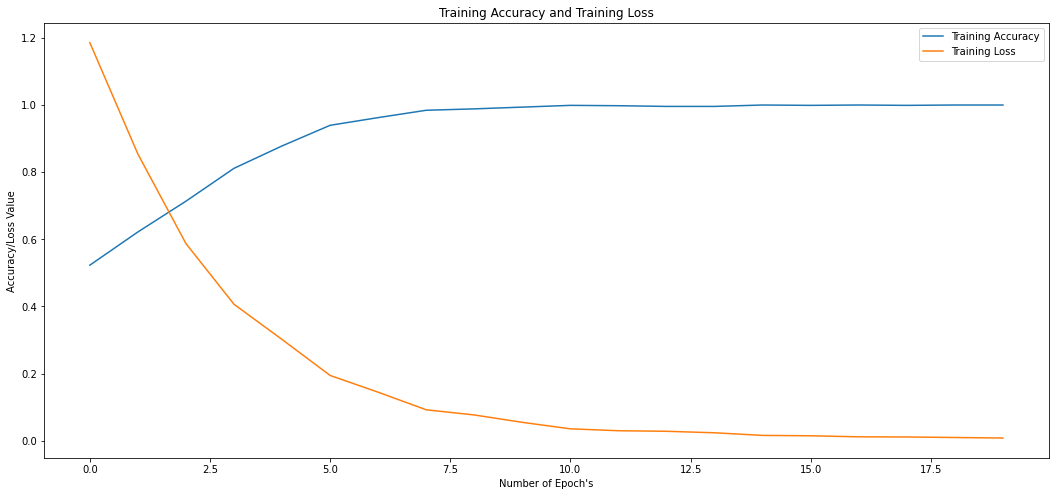

In [49]:
plt.figure(figsize = (18,8))
plt.plot(range(20), history.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), history.history['loss'], label = 'Training Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [50]:
#evaluate the model on test data
predictions = modelCNN.evaluate(x_test, y_test)

8/8 [==============================] - 1s 81ms/step - loss: 0.0052 - accuracy: 1.0000


In [51]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.005171695724129677
ACCURACY : 1.0




---



------ VGG16 ------